In [61]:
import sql_tools
import pandas as pd
from matplotlib import pyplot as plt

In [62]:
def _fetch_foodorder_data(RestaurantID=1):
    cnx, cursor = sql_tools.create_session_cursor()
    query = '''
    SELECT od.order_id, od.food_id, food_name, food_type, quantity, price, order_time from 
    order_details od inner join food inner join `order`
    ON od.food_id = food.food_id AND od.order_id = `order`.order_id
    WHERE od.order_id in (
        select order_id from `order` where restaurant_id = %s
    );
    '''
    result = sql_tools.execute_fetchall(cursor, query, (RestaurantID,) )
    result = pd.DataFrame(result)

    # process data
    result.columns = ['ORDER_ID', 'FOOD_ID', 'FOOD_NAME', 'FOOD_TYPE', 'QUANTITY', 'PRICE', 'ORDER_TIME']
    result = result.astype({'QUANTITY': int})
    return result

def _process_dish_analysis(df, viewmode='D'):
    ''' Processing for the overturn analysis. This function receives food order,
        Then group by food name and date respectively.
    '''
    ans = pd.DataFrame()
    df1 = df.groupby('FOOD_NAME')
    for food_name, sub_df in df1:
        date_grouped = sub_df.groupby(pd.Grouper(key='ORDER_TIME', axis=0, freq=viewmode)).sum(numeric_only=True)
        ans[food_name] = date_grouped['QUANTITY']
    ans.index = [ans.index[i].to_pydatetime().strftime('%Y-%m-%d') for i in range(len(ans.index))]
    return ans


In [63]:
# fetch data
result = _fetch_foodorder_data()
# process data
result = _process_dish_analysis(result, 'D') 
   
result

,剁椒鱼头,口味鸡,小炒黄牛肉,有机花菜,烟笋炒腊肉,煎茄子,玉米淮山,筒骨煨湖藕,茶树菇土鸡汤,辣椒炒肉
2023-03-01,22,14,19,30,28,28,8,32,21,33
2023-03-02,18,13,22,30,25,27,10,31,25,34
2023-03-03,26,15,29,34,24,24,21,35,23,31
2023-03-04,17,10,20,34,25,28,11,33,23,33
2023-03-05,13,15,19,32,22,27,16,30,22,33
2023-03-06,17,14,23,31,25,20,16,34,26,33
2023-03-07,13,8,20,27,19,23,11,24,18,27
2023-03-08,22,9,28,34,29,28,12,36,31,34
2023-03-09,18,20,27,30,14,27,18,35,25,30
2023-03-10,14,8,23,30,25,21,12,31,21,30


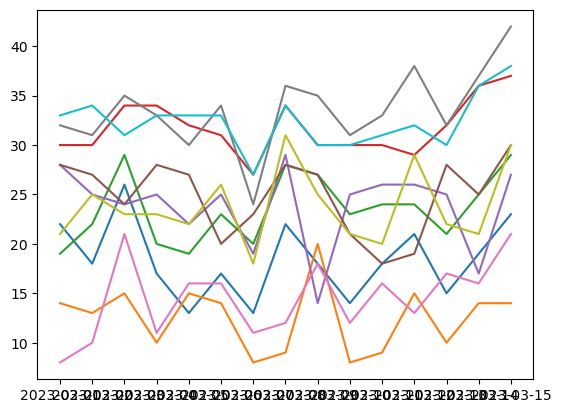

In [64]:
plt.plot(result)

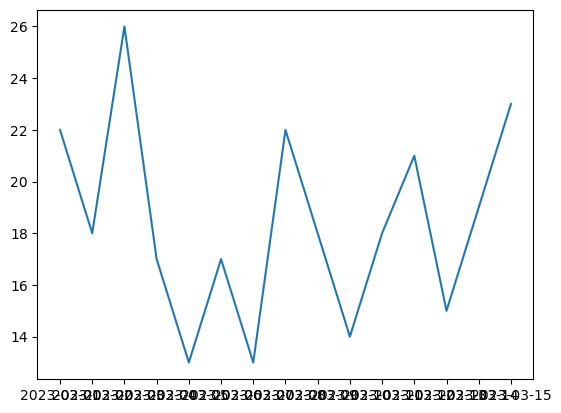

In [65]:
# Do regression:
from sklearn.linear_model import LinearRegression

line = result['剁椒鱼头']
plt.plot(line)
# Do regression here, and plot the fitted line



Text(0, 0.5, 'Predict Sale in Linear Regression')

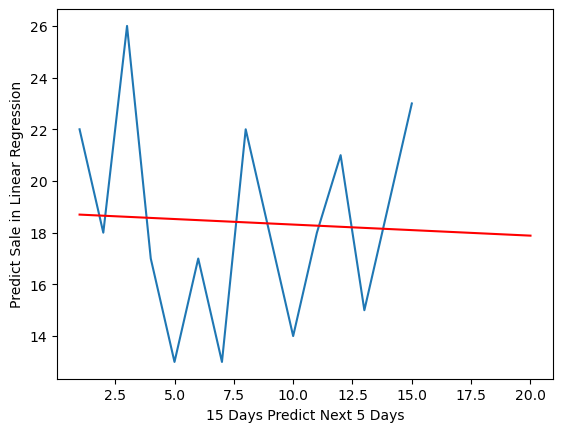

In [66]:
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15]])
Y = np.array([])

for i in range(15):
    Y = np.append(Y,[int(result['剁椒鱼头'][i])])

reg = LinearRegression().fit(X,Y)
#Predict_X = np.array([[16], [17], [18], [19], [20]])
#Predict_Y = reg.predict(Predict_X)

Midline_X = ([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]])
Midline_Y = reg.predict(Midline_X)

plt.plot(X,Y)
plt.plot(Midline_X,Midline_Y,"r")
plt.xlabel('15 Days Predict Next 5 Days')
plt.ylabel('Predict Sale in Linear Regression')

